In [9]:
##
# created by sarthak and harsh on 11/20/21
##

In [1]:
import numpy as np
import pandas as pd

# Importing the dataset

In [2]:
# importing the dataset files
songmetadata = pd.read_csv(r'project-files\song_data.csv')
othersongdata = pd.read_csv(r'project-files\triplets_file.csv')

# naming the columns for the othersongdata
othersongdata.columns = ['user_id', 'song_id', 'listen_count']

# merging both the datasets and removing duplicates
song_data = pd.merge(othersongdata, songmetadata.drop_duplicates(['song_id']), on='song_id', how="left")

# writing the file in .csv to visualize in tableau
song_data.to_csv(r'project-files\music_data_combined.csv', index = False)

In [3]:
song_data.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [4]:
song_data.dtypes

user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

In [5]:
### This dataset has two million observations.

### It consists of seven variables

## Song_id = Object
# (Unique ID for every song in the dataset, in total there are 1000 songs in the dataset)

## User_id = Object (Unique ID for every user)

## Listen_count = int 
# (Number of times a song was listened by an user)

## Artist_name = Str 
# (Name of Artist) 

## Title = Str 
# (Title of each song)

## Year = int 
# (Categorical variable with lot of zero values)

## Release = Str
# (Album to which the songs belong to)

# Preprocessing dataframe

In [6]:
# Calculating the listen count by artist
n = song_data.groupby('artist_name')[['listen_count']].sum()
print(n)

                      listen_count
artist_name                       
!!!                            227
'N Sync/Phil Collins           224
+ / - {Plus/Minus}             883
+44                            590
10 Years                       971
...                            ...
moe.                           728
rinôçérôse                     208
the bird and the bee          9654
themselves                     192
tobyMac                        547

[3375 rows x 1 columns]


In [7]:
# We now sort the data in descending order of the their listen_counts

type(n) # n is a pandas dataframe

listens = n.sort_values(by='listen_count', ascending=False)
artist_top = listens.nlargest(18, 'listen_count')

artist_top = artist_top.reset_index()
artist_top

,artist_name,listen_count
0,Coldplay,70138
1,Kings Of Leon,68570
2,Florence + The Machine,60066
3,Dwight Yoakam,54136
4,Björk,53814
5,The Black Keys,52220
6,Jack Johnson,44083
7,Justin Bieber,41645
8,OneRepublic,40981
9,Train,39279


## Visualizing the dataset

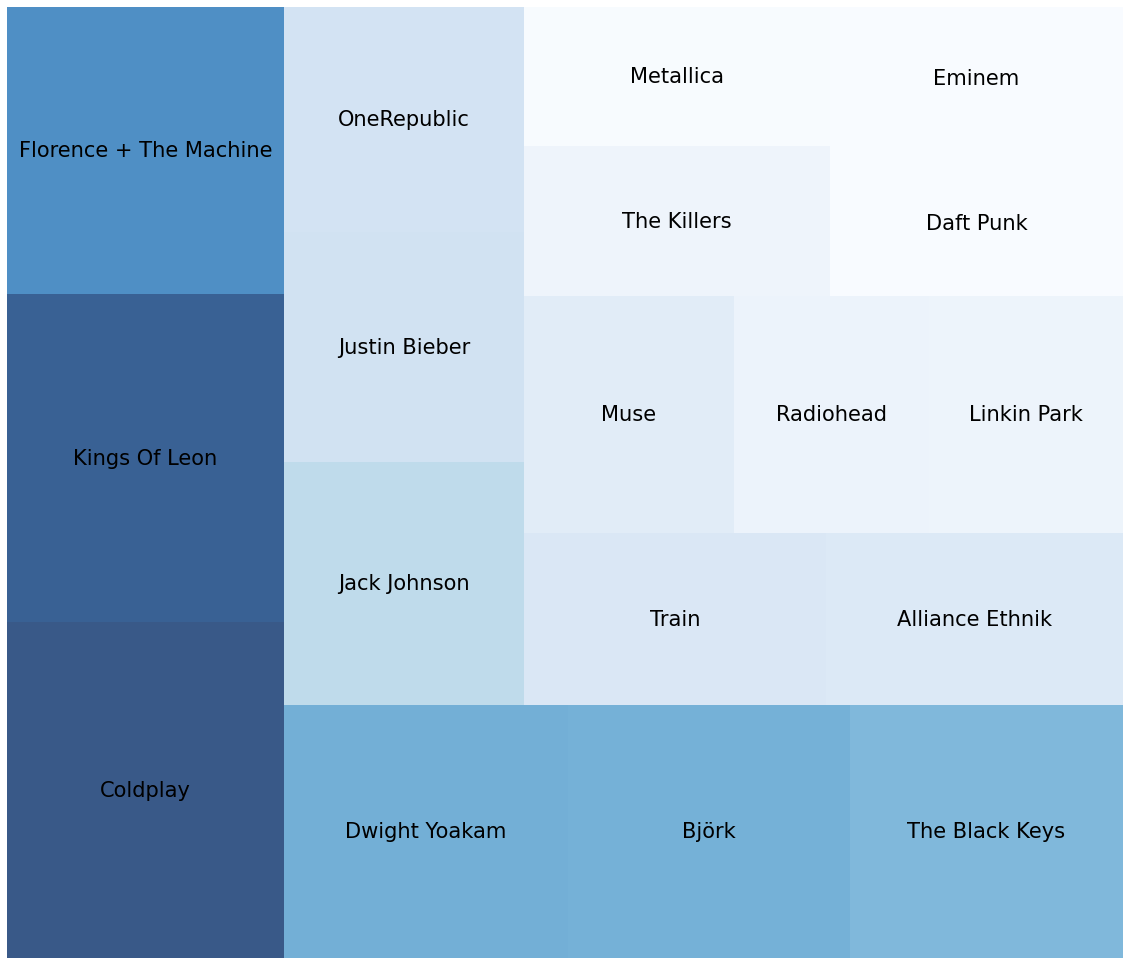

In [8]:
# Plotting a visualization. Here we have used a treemap
# This can aid us in bulding a popular playlist
import matplotlib
import matplotlib.pyplot as plt
import squarify

artists_arr = artist_top['artist_name'].to_numpy()
listens_arr = artist_top['listen_count'].to_numpy()

#Utilise matplotlib to scale our listen numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(listens_arr), vmax=max(listens_arr))
colors = [matplotlib.cm.Blues(norm(value)) for value in listens_arr]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 17.5)

squarify.plot(sizes=listens_arr, label=artists_arr,color=colors, alpha=.8, text_kwargs={'fontsize': 21})
plt.axis('off')
plt.show()

In [60]:
# Calculating the listen count by song
grpbysong = song_data.groupby('title')[['listen_count']].sum()
print(grpbysong)

                                                    listen_count
title                                                           
#!*@ You Tonight [Featuring R. Kelly] (Explicit...           148
#40                                                         1831
& Down                                                       739
' Cello Song                                                 254
'97 Bonnie & Clyde                                           140
...                                                          ...
the Love Song                                                279
you were there with me                                        89
¡Viva La Gloria! (Album Version)                             538
¿Lo Ves? [Piano Y Voz]                                       191
Época                                                        443

[9567 rows x 1 columns]


In [64]:
grpbysong = grpbysong.sort_values(by='listen_count', ascending=False)
song_top = grpbysong.nlargest(18, 'listen_count')

song_top = song_top.reset_index()
song_top

,title,listen_count
0,You're The One,54915
1,Undo,49253
2,Revelry,41418
3,Horn Concerto No. 4 in E flat K495: II. Romanc...,31153
4,Sehr kosmisch,31036
5,Dog Days Are Over (Radio Edit),26663
6,Secrets,22100
7,Canada,21019
8,Invalid,19645
9,Ain't Misbehavin,18309


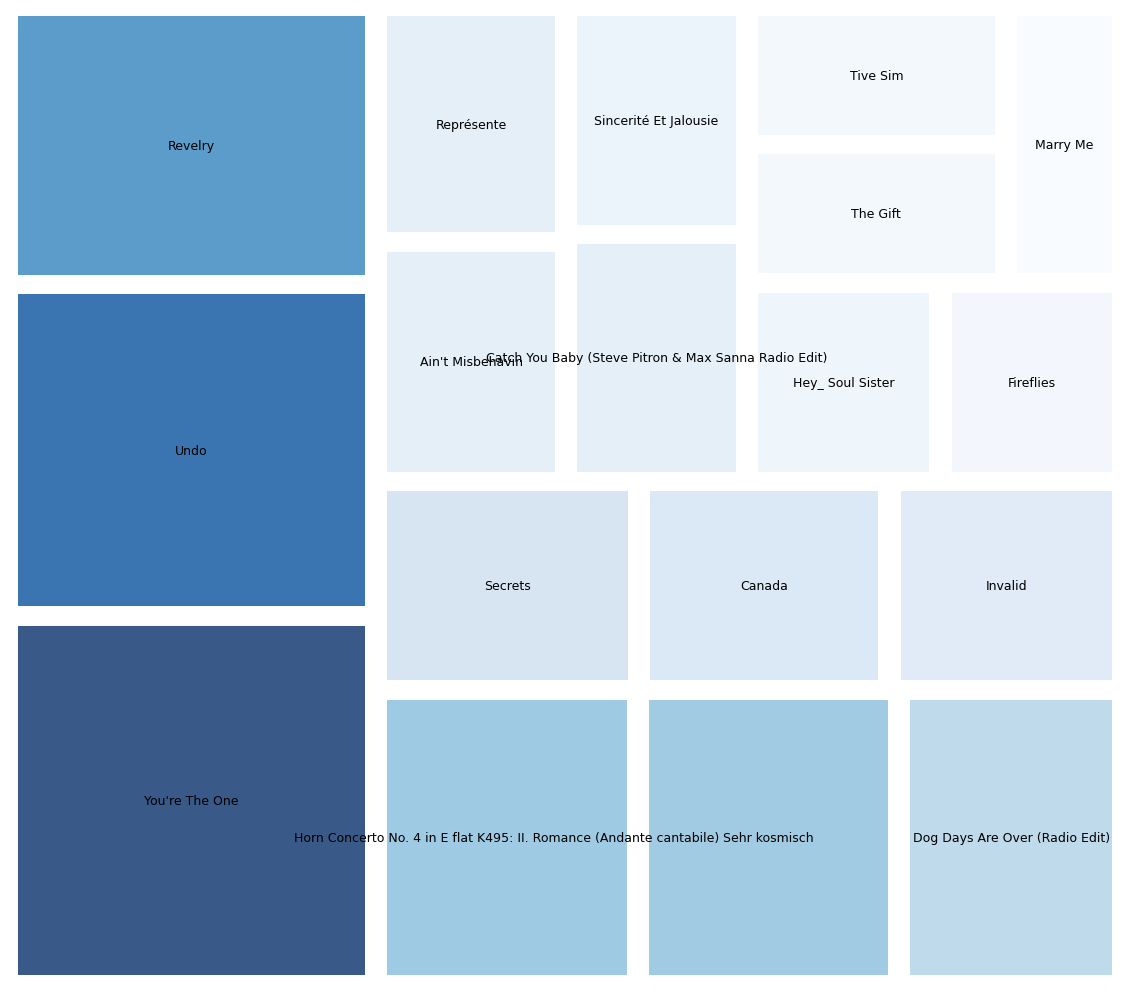

In [125]:
# Treemap of the most popular songs
songs_arr = song_top['title'].to_numpy()
listenbysong_arr = song_top['listen_count'].to_numpy()

norm = matplotlib.colors.Normalize(vmin=min(listenbysong_arr), vmax=max(listenbysong_arr))
colors = [matplotlib.cm.Blues(norm(value)) for value in listenbysong_arr]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 18)

squarify.plot(sizes=listenbysong_arr, label=songs_arr, color=colors, alpha=.8, pad=True, text_kwargs={'fontsize': 12.5})
plt.axis('off')
plt.show()

# Popularity Recommendation Engine

In [121]:
def popularplaylistbyartist():
    print('#### Top Artists ####')
    print(artist_top['artist_name'])
    
def popularplaylistbytracks():
    print('#### Top Songs ####')
    for i in range(0, 17):
        t = song_top['title'][i]
        print(t, 'by', song_data['artist_name'][song_data['title'] == t].values[0])

In [108]:
popularplaylistbyartist()

#### Top Artists ####
0                   Coldplay
1              Kings Of Leon
2     Florence + The Machine
3              Dwight Yoakam
4                      Björk
5             The Black Keys
6               Jack Johnson
7              Justin Bieber
8                OneRepublic
9                      Train
10           Alliance Ethnik
11                      Muse
12                 Radiohead
13               Linkin Park
14               The Killers
15                 Metallica
16                 Daft Punk
17                    Eminem
Name: artist_name, dtype: object


In [122]:
popularplaylistbytracks()

#### Top Songs ####
You're The One by Dwight Yoakam
Undo by Björk
Revelry by Kings Of Leon
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) by Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
Sehr kosmisch by Harmonia
Dog Days Are Over (Radio Edit) by Florence + The Machine
Secrets by OneRepublic
Canada by Five Iron Frenzy
Invalid by Tub Ring
Ain't Misbehavin by Sam Cooke
Représente by Alliance Ethnik
Catch You Baby (Steve Pitron & Max Sanna Radio Edit) by Lonnie Gordon
Sincerité Et Jalousie by Alliance Ethnik
Hey_ Soul Sister by Train
Fireflies by Charttraxx Karaoke
The Gift by Angels and Airwaves
Tive Sim by Cartola


# Music Correlation Recommendation Engine

In [3]:
import Recommenders as Recommenders

In [7]:
song_data['song'] = song_data['title'] + ' - ' + song_data['artist_name']
song_data.head(10)

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007,Apuesta Por El Rock 'N' Roll - Héroes del Sile...
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008,Paper Gangsta - Lady GaGa
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999,Stacked Actors - Foo Fighters
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0,Sehr kosmisch - Harmonia
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002,Heaven's gonna burn your eyes - Thievery Corpo...


In [8]:
mcr = Recommenders.item_similarity_recommender_py()
mcr.create(song_data, 'user_id', 'song')

In [9]:
# the user can be switched by changing the index.
# Here it is the user with index 40
user_items = mcr.get_user_items(song_data['user_id'][40])

In [10]:
# prints the song history of the user
for user_item in user_items:
    print(user_item)

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
Constellations - Jack Johnson
Learn To Fly - Foo Fighters
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Sehr kosmisch - Harmonia
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
Clarity - John Mayer
I?'m A Steady Rollin? Man - Robert Johnson
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Breakout - Foo Fighters
Ragged Wood - Fleet Foxes
Mykonos - Fleet Foxes
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
Warning - Incubus
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and 

# Experimental Results

## User-based Collaborative filtering

In [154]:
# recommend similar songs to the user based on his/her listening history
mcr.recommend(song_data['user_id'][40])

No. of unique songs for the user: 45
no. of unique songs in the training set: 9953
Non zero values in cooccurence_matrix :268460


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Quiet Houses - Fleet Foxes,0.034172,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Meadowlarks - Fleet Foxes,0.033473,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Heard Them Stirring - Fleet Foxes,0.032683,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Great Indoors - John Mayer,0.032123,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tiger Mountain Peasant Song - Fleet Foxes,0.031740,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sun It Rises - Fleet Foxes,0.031253,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Your Protector - Fleet Foxes,0.030409,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oliver James - Fleet Foxes,0.030237,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Belle - Jack Johnson,0.028708,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,If I Could - Jack Johnson,0.028350,10


## Song-based Collaborative filtering

In [151]:
# finds similar songs based on the entered song
mcr.get_similar_items(['Stacked Actors - Foo Fighters'])

no. of unique songs in the training set: 9953
Non zero values in cooccurence_matrix :5078


,user_id,song,score,rank
0,,Generator - Foo Fighters,0.299539,1
1,,Breakout - Foo Fighters,0.210863,2
2,,Next Year - Foo Fighters,0.209016,3
3,,Weenie Beenie - Foo Fighters,0.160550,4
4,,X-Static - Foo Fighters,0.157143,5
5,,For All The Cows - Foo Fighters,0.150628,6
6,,Floaty - Foo Fighters,0.148760,7
7,,No Way Back - Foo Fighters,0.148325,8
8,,Oh_ George - Foo Fighters,0.146789,9
9,,Low - Foo Fighters,0.142857,10
